<a href="https://colab.research.google.com/github/jennadof/Predicting-whether-a-person-interested-to-buy-term-deposit-using-logistic-regression/blob/main/logisticProject_banking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [ ]:
#SECTION I: DATA LOADING

In [ ]:
data = pd.read_csv("/content/portu_banking_final.csv")

In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [ ]:
print("Dimension of dataset:", data.shape)
print("NUmber of rows in the dataset:", data.shape[0])
print("Number of columns in the dataset:", data.shape[1])

Dimension of dataset: (41188, 21)
NUmber of rows in the dataset: 41188
Number of columns in the dataset: 21


In [ ]:
#printing attributes (columns) name
print("Column Names:", data.columns.values)

Column Names: ['age' 'job' 'marital' 'education' 'default' 'housing' 'loan' 'contact'
 'month' 'day_of_week' 'duration' 'campaign' 'pdays' 'previous' 'poutcome'
 'emp_var_rate' 'cons_price_idx' 'cons_conf_idx' 'euribor3m' 'nr_employed'
 'y']


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  object 
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [ ]:
#SECTION II: DATA CLEANING 

In [ ]:
data.describe()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,258.285010,2.567593,963.568005,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,259.279249,2.770014,211.772296,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,4918.000000,56.000000,9999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  object 
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [ ]:
data['age'].unique()

array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', '35-30', '25', '57', '63', '58', '60', '30-35', '64', '51',
       '23', '20', '74', '80', '61', '25-30', '62', '75', '21', '82',
       '77', '18-25', '30-32', '70', '50-55', '76', '73', '66', '22',
       '71', '19', '79', '88', '65', '67', '81', '18', '84', '69', '98',
       '85', '83', '78', '92', '45-50', '20-25', '20-40', '35-40', '86',
       '94', '17', '91', '89', '87', '95', '30-40', 56, 39, 30, 53, 37,
       22, 45, 31, 24, 50, 58, 33, 27, 28, 32, 51, 41, 49, 43, 44, 35, 29,
       26, 57, 25, 42, 48, 46, 67, 38, 34, 54, 40, 23, 47, 62, 75, 55, 36,
       52, 59, 78, 70, 60, 20, 66, 61, 21, 88, 18, 68, 71, 73, 80, 79, 63,
       76, 83, 65, 19, 86, 17, 72, 69, 81, 64, 77, 74, 85, 82],
      dtype=object)

In [ ]:
data['age']=data['age'].replace(['35-30'],33)
data['age']=data['age'].replace(['25-30'],28)
data['age']=data['age'].replace(['30-35'],33)
data['age']=data['age'].replace(['30-32'],31)
data['age']=data['age'].replace(['18-25'],21)
data['age']=data['age'].replace(['25-30'],28)
data['age']=data['age'].replace(['45-50'],48)
data['age']=data['age'].replace(['50-55'],53)
data['age']=data['age'].replace(['20-40'],30)
data['age']=data['age'].replace(['35-40'],38)
data['age']=data['age'].replace(['20-25'],23)
data['age']=data['age'].replace(['30-40'],35)

In [ ]:
data['age'].apply(pd.to_numeric)

0        44
1        53
2        28
3        39
4        55
         ..
41183    59
41184    31
41185    42
41186    48
41187    25
Name: age, Length: 41188, dtype: int64

In [ ]:
data['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6035
professional.course     5243
basic.4y                4164
basic.6y                2286
unknown                 1731
illiterate                18
basic-4y                  12
basic-9y                  10
basic-6y                   6
Name: education, dtype: int64

In [ ]:
data['education']= data['education'].replace('basic-4y','basic.4y')
data['education']= data['education'].replace('basic-9y','basic.9y')
data['education']= data['education'].replace('basic-6y','basic.6y')
data['education']= data['education'].replace('unknown','university.degree')

In [ ]:
data['job'].value_counts()

admin.           10420
blue-collar       9253
technician        6742
services          3966
management        2923
retired           1717
entrepreneur      1456
self-employed     1421
housemaid         1059
unemployed        1014
student            873
unknown            329
RETIRED              3
SERVICES             3
STUDENT              2
ADMIN.               2
MANAGEMENT           1
TECHNICIAN           1
BLUE-COLLAR          1
HOUSEMAID            1
UNKNOWN              1
Name: job, dtype: int64

In [ ]:
data['job']= data['job'].replace('ADMIN.','admin.')
data['job']= data['job'].replace('RETIRED','retired')
data['job']= data['job'].replace('SERVICES','services')
data['job']= data['job'].replace('STUDENT','student')
data['job']= data['job'].replace('MANAGEMENT','management')
data['job']= data['job'].replace('TECHNICIAN','technician')
data['job']= data['job'].replace('BLUE-COLLAR','blue-collar')
data['job']= data['job'].replace('HOUSEMAID','housemaid')
data['job']= data['job'].replace('UNKNOWN','admin.')

In [ ]:
data['job'].value_counts()

admin.           10423
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            329
Name: job, dtype: int64

In [ ]:
data['marital'].value_counts()

married     24923
single      11565
divorced     4608
unknown        80
M               5
D               4
S               3
Name: marital, dtype: int64

In [ ]:
data['marital']= data['marital'].replace('M','married')   # data[cols] = data[cols].replace({'M':"married", "D":"divorced"})
data['marital']= data['marital'].replace('D','divorced')
data['marital']= data['marital'].replace('S','single')
data['marital']= data['marital'].replace('unknown','married')

data['marital'].value_counts()

married     25008
single      11568
divorced     4612
Name: marital, dtype: int64

In [ ]:
data['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [ ]:
data['default']= data['default'].replace('unknown','no')
data['default'].value_counts()

no     41185
yes        3
Name: default, dtype: int64

In [ ]:
data['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [ ]:
data['housing']= data['housing'].replace('unknown','yes')
data['housing'].value_counts()

yes    22566
no     18622
Name: housing, dtype: int64

In [ ]:
data['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [ ]:
data['loan']= data['loan'].replace('unknown','no')

In [ ]:
data['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [ ]:
data['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [ ]:
data['day_of_week'].value_counts()    

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [ ]:
data['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [ ]:
#SECTION II: EXPLORING DATA WITH GROUP BY 

In [ ]:
data.groupby('y').mean()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,
0,220.844807,2.633085,985.345135,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [ ]:
data.groupby('job').mean()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,
admin.,254.292910,2.623621,956.050465,0.189005,0.015667,93.534098,-40.245064,3.550400,5164.127929,0.129713
blue-collar,264.542360,2.558461,987.105468,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,263.267857,2.535714,987.448489,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [ ]:
data.groupby('marital').mean()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,
divorced,253.790330,2.613400,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,257.615483,2.574776,967.871001,0.155990,0.182330,93.596964,-40.272417,3.744447,5171.802531,0.101727
single,261.524378,2.533800,952.243603,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041


In [ ]:
data.groupby('education').mean()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,
basic.4y,264.827826,2.600575,970.015326,0.147031,0.215924,93.658309,-40.239871,3.751768,5170.124880,0.102490
basic.6y,264.414485,2.556283,980.368237,0.129145,0.231152,93.650062,-41.127880,3.772942,5174.718063,0.082024
basic.9y,261.291811,2.532341,979.133168,0.141439,0.159239,93.623399,-41.326749,3.697963,5172.294012,0.078246
high.school,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,252.533855,2.586115,962.482548,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,254.365062,2.567595,951.984747,0.196633,-0.017231,93.514034,-39.963602,3.534824,5162.768386,0.138211


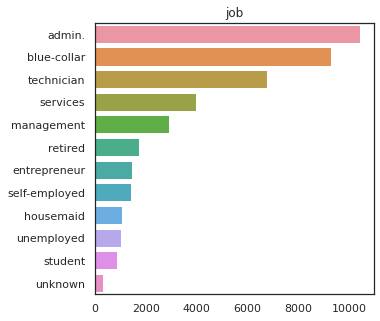

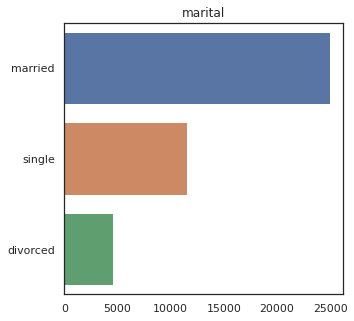

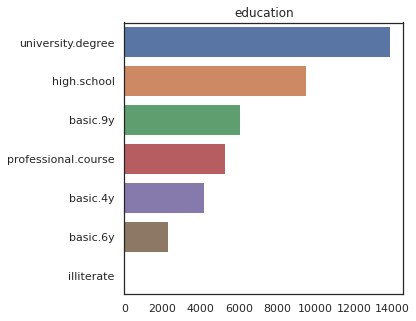

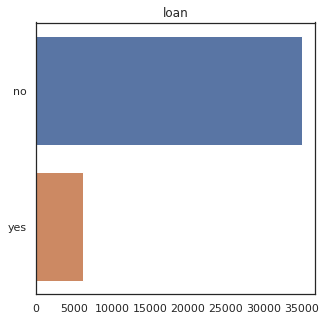

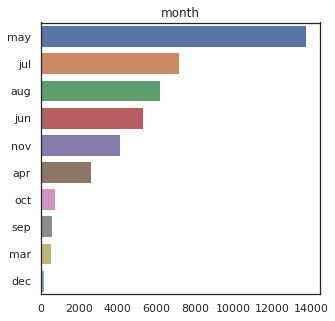

In [ ]:
#SECTION III: Exploratory Data Analysis
# part 1 bar graph
data_b = ['job','marital','education','loan','month']
for col in data_b :
  plt.figure(figsize=(5,5))
  sns.barplot(data[col].value_counts().values,data[col].value_counts().index)
  plt.title(col)
plt.show()

In [ ]:
data['age'] = data['age'].astype(int)
data['age']

0        44
1        53
2        28
3        39
4        55
         ..
41183    59
41184    31
41185    42
41186    48
41187    25
Name: age, Length: 41188, dtype: int64

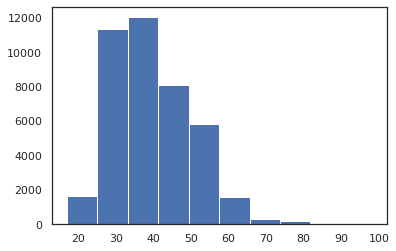

In [ ]:
plt.hist(data['age'])
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [ ]:
data['default'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
#SECTION IV: categorial variable Encoding 
dummies = pd.get_dummies(data)
dummies

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,222,1,999.0,0,1.4,94.465,-41.8,4.866,5228.1,...,0,0,0,0,1,0,0,0,1,0
41184,31,196,2,999.0,0,1.1,93.994,-36.4,4.860,5191.0,...,0,0,0,0,1,0,0,0,1,0
41185,42,62,3,999.0,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,0,0,1,0,1,0
41186,48,200,2,999.0,0,-3.4,92.431,-26.9,0.742,5017.5,...,1,0,0,0,0,1,0,0,1,0


In [ ]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  float64
 4   previous                       41188 non-null  int64  
 5   emp_var_rate                   41188 non-null  float64
 6   cons_price_idx                 41188 non-null  float64
 7   cons_conf_idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr_employed                    41188 non-null  float64
 10  y                              41188 non-null  int64  
 11  job_admin.                     41188 non-null  uint8  
 12  job_blue-collar                41188 non-null 

In [ ]:
#SECTION V: Preliminary Training 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, val = train_test_split(dummies, test_size=0.25)

In [ ]:
x_train=train.drop(['y'],axis = 1)

In [ ]:
y_train = train['y']

In [ ]:
x_val = val.drop(['y'],axis = 1)
y_val = val['y']

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_predict = classifier.predict(x_val)

In [ ]:
from sklearn.metrics import classification_report , confusion_matrix

In [ ]:
print(classification_report(y_val,y_predict))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      9138
           1       0.69      0.41      0.52      1159

    accuracy                           0.91     10297
   macro avg       0.81      0.70      0.73     10297
weighted avg       0.90      0.91      0.90     10297



In [ ]:
#CONFUSION MATRIX

In [ ]:
confusion_matrix(y_val,y_predict)

array([[8919,  219],
       [ 679,  480]])

In [ ]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
sm_xtrain , sm_ytrain = sm.fit_resample(x_train,y_train)

In [ ]:
y_train.value_counts()

0    27410
1     3481
Name: y, dtype: int64

In [ ]:
sm_ytrain.value_counts()

0    27410
1    27410
Name: y, dtype: int64

In [ ]:
classifier.fit(sm_xtrain,sm_ytrain)

LogisticRegression(random_state=0)

In [ ]:
y_preds = classifier.predict(x_val)

In [ ]:
print(classification_report(y_val,y_preds))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      9138
           1       0.44      0.83      0.58      1159

    accuracy                           0.86     10297
   macro avg       0.71      0.85      0.75     10297
weighted avg       0.92      0.86      0.88     10297



In [ ]:
confusion_matrix(y_val , y_predict)

array([[8919,  219],
       [ 679,  480]])

In [ ]:
confusion_matrix(y_val , y_preds)

array([[7925, 1213],
       [ 200,  959]])

In [ ]:
#SECTION vIII


In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(classifier )
rfe = rfe.fit(x_train, y_train)

In [ ]:
print(rfe.ranking_)

[22 18  1 24  1  7  8  6  1 12  1  1 13 28 23  1  1  1  1 17 14 29  1 10
  1 16  9  3  4 25 11  1 19 30  1 27 15 21  1  1  1  1  1  5  1  1  1  1
  1 20 26  1  2  1  1  1  1  1]


In [ ]:
print(rfe.support_)

[False False  True False  True False False False  True False  True  True
 False False False  True  True  True  True False False False  True False
  True False False False False False False  True False False  True False
 False False  True  True  True  True  True False  True  True  True  True
  True False False  True False  True  True  True  True  True]


In [ ]:
#SMOTE gave a better understanding of the metrics and imbalance the data